In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('Credit.csv')

In [7]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [8]:
df.corr()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


Text(0, 0.5, 'Age')

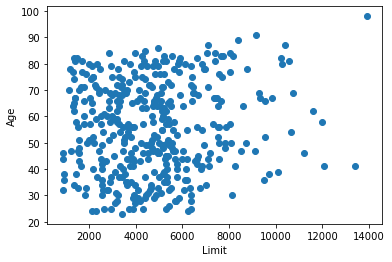

In [10]:
plt.scatter(df['Limit'],df['Age'])
plt.xlabel('Limit')
plt.ylabel('Age')

Text(0, 0.5, 'Rating')

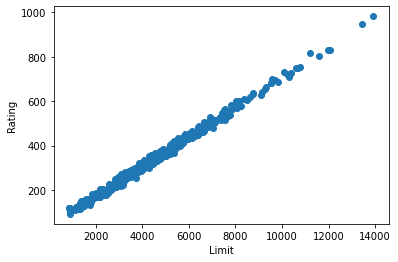

In [11]:
plt.scatter(df['Limit'],df['Rating'])
plt.xlabel('Limit')
plt.ylabel('Rating')

In [17]:
import statsmodels.api as sm

Let's build 2 models to predict Balance. One with 2 uncorrelated features(Age and limit) and the 2nd one with two correlted features(limit and rating)

In [32]:
####Model with un corrleated features(Model1)

In [33]:
X1 = df[['Age', 'Limit']]### Predictor or input variables
y1 = df['Balance']#### response or Target Variable


In [34]:
X1 = sm.add_constant(X1)

In [35]:
## fit a OLS model with intercept on TV and Radio

model1= sm.OLS(y1, X1).fit()

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          3.52e-120
Time:                        22:24:35   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Model-2

In [41]:
X2 = df[['Rating', 'Limit']]
y2 = df['Balance']

X2 = sm.add_constant(X2)


model2= sm.OLS(y2, X2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          7.57e-119
Time:                        22:44:34   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150
==============================================================================
Omnibus:                       23.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.187
Skew:                           0.394   Prob(JB):                     5.10e-09
Kurtosis:                       4.293   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""